# Workout Classification - Tensorflow



## Mengimport Library

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

## Mendownload Dataset yang diperluhkan


In [ ]:
# Upload first your data before execute these code below
path_workout = "/content/sample_data/pushupyt.csv"; # change this
path_other = "/content/sample_data/dance.csv"; # change this
name_class = "push up" # change this
# change resolution if you using video with different resolution
resolution = {
    "width": 640,
    "height": 360
}

In [ ]:
df_workout = pd.read_csv(path_workout)
df_other = pd.read_csv(path_other)

In [ ]:
df_workout

,nose_x,nose_y,left_eye_x,left_eye_y,right_eye_x,right_eye_y,left_ear_x,left_ear_y,right_ear_x,right_ear_y,...,right_hip_x,right_hip_y,left_knee_x,left_knee_y,right_knee_x,right_knee_y,left_ankle_x,left_ankle_y,right_ankle_x,right_ankle_y
0,187.357760,237.886076,185.824887,236.873574,186.420553,238.014650,195.281056,188.589892,193.268412,198.589640,...,364.729205,250.011435,492.587105,314.276447,411.428367,316.543064,582.973629,365.808334,557.177530,360.695200
1,84.812554,280.354676,96.770440,264.570112,83.982107,264.600724,145.481394,253.274657,119.203043,254.640090,...,344.567927,298.646322,498.602092,355.616229,447.689968,337.588542,583.578891,356.560273,510.817589,350.207978
2,83.409206,315.695703,93.555014,301.046459,80.903607,300.667742,143.677952,285.282897,112.944514,287.580086,...,352.280339,318.990998,498.446805,357.850051,416.031388,335.859224,583.116823,356.808537,512.431258,352.459377
3,82.856206,333.482648,91.760576,319.134290,79.648189,318.087207,143.960750,306.116970,111.891327,303.682796,...,355.184017,321.388892,500.155690,362.686873,421.221218,333.158994,579.165877,359.281189,534.164543,346.726331
4,85.843786,355.921302,93.672365,340.769336,81.899409,339.665121,144.472120,323.337012,116.865612,321.367527,...,364.098237,334.392541,501.155733,367.634345,424.075175,329.617408,578.364895,364.938448,534.169701,347.916087
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
816,600.093670,385.807575,614.714824,381.189807,600.430213,379.052128,610.786770,343.268515,569.907732,338.548601,...,351.400310,263.699377,360.290613,258.375906,326.731619,271.273569,312.890514,207.458774,288.734778,224.009824
817,595.463959,382.234809,609.753498,378.365398,598.440750,376.628900,610.762642,338.035549,574.877649,332.150883,...,356.229934,267.909039,353.404458,258.497756,323.772663,274.559166,302.275269,199.130225,288.234084,209.627882
818,599.786652,378.737311,613.733541,372.383650,602.700332,369.428239,611.688740,332.432238,575.319170,324.056913,...,370.825931,269.636207,378.703220,258.861790,336.998175,266.616251,315.438265,201.019955,304.962196,247.268921
819,595.327120,356.253644,609.813119,347.677476,593.655325,346.959751,613.373017,307.842285,567.465053,301.200813,...,386.745259,260.530610,384.896064,256.071368,344.147026,269.543956,341.705484,253.272700,308.034634,220.986534


In [ ]:
df_other

,nose_x,nose_y,left_eye_x,left_eye_y,right_eye_x,right_eye_y,left_ear_x,left_ear_y,right_ear_x,right_ear_y,...,right_hip_x,right_hip_y,left_knee_x,left_knee_y,right_knee_x,right_knee_y,left_ankle_x,left_ankle_y,right_ankle_x,right_ankle_y
0,264.292416,83.783504,265.504885,81.584498,261.166072,81.713324,291.457379,63.761417,258.914323,84.364093,...,322.131567,189.246739,353.226663,208.678820,311.160951,210.139008,360.496218,213.170110,320.870001,214.821347
1,264.292416,83.783504,265.504885,81.584498,261.166072,81.713324,291.457379,63.761417,258.914323,84.364093,...,322.131567,189.246739,353.226663,208.678820,311.160951,210.139008,360.496218,213.170110,320.870001,214.821347
2,292.042772,63.019769,300.669498,51.087825,277.177682,53.582877,308.756935,51.350810,263.010624,56.533590,...,315.824413,186.644795,420.202685,262.694924,312.163042,221.625098,375.893907,237.478478,308.810223,236.905919
3,295.243728,33.023355,308.541480,18.048312,267.461742,56.123359,322.552364,20.831887,261.056124,48.297799,...,287.639108,177.824614,422.452732,262.801035,306.040913,211.568756,388.592023,228.471943,312.991360,215.892006
4,293.984872,39.157600,300.951799,23.933182,280.976220,24.588745,307.912168,26.610056,267.162801,29.386485,...,308.643058,165.947684,423.770567,262.791324,320.843569,191.359932,391.514033,205.062929,337.064157,196.057643
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11130,254.124199,169.929333,227.074971,164.491220,236.066554,184.391280,203.611431,164.260054,216.400695,185.184304,...,335.247898,186.405259,396.910774,100.901852,419.864313,201.866667,463.853778,60.182358,490.025244,220.103927
11131,234.751625,180.895610,187.030430,180.014087,201.992169,194.103645,194.470091,168.470283,204.588079,193.943561,...,336.896472,188.572448,393.235002,103.779764,419.592673,204.241774,463.078832,60.209727,487.446306,221.685458
11132,303.499438,186.028830,281.022134,168.790254,256.516604,197.044483,221.553272,163.830887,245.622285,192.437461,...,338.418576,192.624293,394.520260,101.911798,417.863429,205.900600,461.930176,60.533004,487.177329,222.348070
11133,227.215858,174.252704,180.332176,177.461434,188.951082,189.743666,186.780988,169.347700,192.135999,190.560507,...,331.131748,186.857139,394.792229,100.070991,413.264272,200.972164,467.094994,57.409474,487.276733,220.248534


## Data Preparation

In [ ]:
df_workout["class"] = name_class
df_workout

,nose_x,nose_y,left_eye_x,left_eye_y,right_eye_x,right_eye_y,left_ear_x,left_ear_y,right_ear_x,right_ear_y,...,right_hip_y,left_knee_x,left_knee_y,right_knee_x,right_knee_y,left_ankle_x,left_ankle_y,right_ankle_x,right_ankle_y,class
0,187.357760,237.886076,185.824887,236.873574,186.420553,238.014650,195.281056,188.589892,193.268412,198.589640,...,250.011435,492.587105,314.276447,411.428367,316.543064,582.973629,365.808334,557.177530,360.695200,push up
1,84.812554,280.354676,96.770440,264.570112,83.982107,264.600724,145.481394,253.274657,119.203043,254.640090,...,298.646322,498.602092,355.616229,447.689968,337.588542,583.578891,356.560273,510.817589,350.207978,push up
2,83.409206,315.695703,93.555014,301.046459,80.903607,300.667742,143.677952,285.282897,112.944514,287.580086,...,318.990998,498.446805,357.850051,416.031388,335.859224,583.116823,356.808537,512.431258,352.459377,push up
3,82.856206,333.482648,91.760576,319.134290,79.648189,318.087207,143.960750,306.116970,111.891327,303.682796,...,321.388892,500.155690,362.686873,421.221218,333.158994,579.165877,359.281189,534.164543,346.726331,push up
4,85.843786,355.921302,93.672365,340.769336,81.899409,339.665121,144.472120,323.337012,116.865612,321.367527,...,334.392541,501.155733,367.634345,424.075175,329.617408,578.364895,364.938448,534.169701,347.916087,push up
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
816,600.093670,385.807575,614.714824,381.189807,600.430213,379.052128,610.786770,343.268515,569.907732,338.548601,...,263.699377,360.290613,258.375906,326.731619,271.273569,312.890514,207.458774,288.734778,224.009824,push up
817,595.463959,382.234809,609.753498,378.365398,598.440750,376.628900,610.762642,338.035549,574.877649,332.150883,...,267.909039,353.404458,258.497756,323.772663,274.559166,302.275269,199.130225,288.234084,209.627882,push up
818,599.786652,378.737311,613.733541,372.383650,602.700332,369.428239,611.688740,332.432238,575.319170,324.056913,...,269.636207,378.703220,258.861790,336.998175,266.616251,315.438265,201.019955,304.962196,247.268921,push up
819,595.327120,356.253644,609.813119,347.677476,593.655325,346.959751,613.373017,307.842285,567.465053,301.200813,...,260.530610,384.896064,256.071368,344.147026,269.543956,341.705484,253.272700,308.034634,220.986534,push up


In [ ]:
df_other["class"] = "other"
df_other

,nose_x,nose_y,left_eye_x,left_eye_y,right_eye_x,right_eye_y,left_ear_x,left_ear_y,right_ear_x,right_ear_y,...,right_hip_y,left_knee_x,left_knee_y,right_knee_x,right_knee_y,left_ankle_x,left_ankle_y,right_ankle_x,right_ankle_y,class
0,264.292416,83.783504,265.504885,81.584498,261.166072,81.713324,291.457379,63.761417,258.914323,84.364093,...,189.246739,353.226663,208.678820,311.160951,210.139008,360.496218,213.170110,320.870001,214.821347,other
1,264.292416,83.783504,265.504885,81.584498,261.166072,81.713324,291.457379,63.761417,258.914323,84.364093,...,189.246739,353.226663,208.678820,311.160951,210.139008,360.496218,213.170110,320.870001,214.821347,other
2,292.042772,63.019769,300.669498,51.087825,277.177682,53.582877,308.756935,51.350810,263.010624,56.533590,...,186.644795,420.202685,262.694924,312.163042,221.625098,375.893907,237.478478,308.810223,236.905919,other
3,295.243728,33.023355,308.541480,18.048312,267.461742,56.123359,322.552364,20.831887,261.056124,48.297799,...,177.824614,422.452732,262.801035,306.040913,211.568756,388.592023,228.471943,312.991360,215.892006,other
4,293.984872,39.157600,300.951799,23.933182,280.976220,24.588745,307.912168,26.610056,267.162801,29.386485,...,165.947684,423.770567,262.791324,320.843569,191.359932,391.514033,205.062929,337.064157,196.057643,other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11130,254.124199,169.929333,227.074971,164.491220,236.066554,184.391280,203.611431,164.260054,216.400695,185.184304,...,186.405259,396.910774,100.901852,419.864313,201.866667,463.853778,60.182358,490.025244,220.103927,other
11131,234.751625,180.895610,187.030430,180.014087,201.992169,194.103645,194.470091,168.470283,204.588079,193.943561,...,188.572448,393.235002,103.779764,419.592673,204.241774,463.078832,60.209727,487.446306,221.685458,other
11132,303.499438,186.028830,281.022134,168.790254,256.516604,197.044483,221.553272,163.830887,245.622285,192.437461,...,192.624293,394.520260,101.911798,417.863429,205.900600,461.930176,60.533004,487.177329,222.348070,other
11133,227.215858,174.252704,180.332176,177.461434,188.951082,189.743666,186.780988,169.347700,192.135999,190.560507,...,186.857139,394.792229,100.070991,413.264272,200.972164,467.094994,57.409474,487.276733,220.248534,other


In [ ]:
# Combine fist before split dataset
df_data = pd.concat([df_workout, df_other], ignore_index=True, sort=False)
df_data

,nose_x,nose_y,left_eye_x,left_eye_y,right_eye_x,right_eye_y,left_ear_x,left_ear_y,right_ear_x,right_ear_y,...,right_hip_y,left_knee_x,left_knee_y,right_knee_x,right_knee_y,left_ankle_x,left_ankle_y,right_ankle_x,right_ankle_y,class
0,187.357760,237.886076,185.824887,236.873574,186.420553,238.014650,195.281056,188.589892,193.268412,198.589640,...,250.011435,492.587105,314.276447,411.428367,316.543064,582.973629,365.808334,557.177530,360.695200,push up
1,84.812554,280.354676,96.770440,264.570112,83.982107,264.600724,145.481394,253.274657,119.203043,254.640090,...,298.646322,498.602092,355.616229,447.689968,337.588542,583.578891,356.560273,510.817589,350.207978,push up
2,83.409206,315.695703,93.555014,301.046459,80.903607,300.667742,143.677952,285.282897,112.944514,287.580086,...,318.990998,498.446805,357.850051,416.031388,335.859224,583.116823,356.808537,512.431258,352.459377,push up
3,82.856206,333.482648,91.760576,319.134290,79.648189,318.087207,143.960750,306.116970,111.891327,303.682796,...,321.388892,500.155690,362.686873,421.221218,333.158994,579.165877,359.281189,534.164543,346.726331,push up
4,85.843786,355.921302,93.672365,340.769336,81.899409,339.665121,144.472120,323.337012,116.865612,321.367527,...,334.392541,501.155733,367.634345,424.075175,329.617408,578.364895,364.938448,534.169701,347.916087,push up
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11951,254.124199,169.929333,227.074971,164.491220,236.066554,184.391280,203.611431,164.260054,216.400695,185.184304,...,186.405259,396.910774,100.901852,419.864313,201.866667,463.853778,60.182358,490.025244,220.103927,other
11952,234.751625,180.895610,187.030430,180.014087,201.992169,194.103645,194.470091,168.470283,204.588079,193.943561,...,188.572448,393.235002,103.779764,419.592673,204.241774,463.078832,60.209727,487.446306,221.685458,other
11953,303.499438,186.028830,281.022134,168.790254,256.516604,197.044483,221.553272,163.830887,245.622285,192.437461,...,192.624293,394.520260,101.911798,417.863429,205.900600,461.930176,60.533004,487.177329,222.348070,other
11954,227.215858,174.252704,180.332176,177.461434,188.951082,189.743666,186.780988,169.347700,192.135999,190.560507,...,186.857139,394.792229,100.070991,413.264272,200.972164,467.094994,57.409474,487.276733,220.248534,other


In [ ]:
X = df_data.drop(['class'], axis=1)
y = df_data['class']

In [ ]:
X

,nose_x,nose_y,left_eye_x,left_eye_y,right_eye_x,right_eye_y,left_ear_x,left_ear_y,right_ear_x,right_ear_y,...,right_hip_x,right_hip_y,left_knee_x,left_knee_y,right_knee_x,right_knee_y,left_ankle_x,left_ankle_y,right_ankle_x,right_ankle_y
0,187.357760,237.886076,185.824887,236.873574,186.420553,238.014650,195.281056,188.589892,193.268412,198.589640,...,364.729205,250.011435,492.587105,314.276447,411.428367,316.543064,582.973629,365.808334,557.177530,360.695200
1,84.812554,280.354676,96.770440,264.570112,83.982107,264.600724,145.481394,253.274657,119.203043,254.640090,...,344.567927,298.646322,498.602092,355.616229,447.689968,337.588542,583.578891,356.560273,510.817589,350.207978
2,83.409206,315.695703,93.555014,301.046459,80.903607,300.667742,143.677952,285.282897,112.944514,287.580086,...,352.280339,318.990998,498.446805,357.850051,416.031388,335.859224,583.116823,356.808537,512.431258,352.459377
3,82.856206,333.482648,91.760576,319.134290,79.648189,318.087207,143.960750,306.116970,111.891327,303.682796,...,355.184017,321.388892,500.155690,362.686873,421.221218,333.158994,579.165877,359.281189,534.164543,346.726331
4,85.843786,355.921302,93.672365,340.769336,81.899409,339.665121,144.472120,323.337012,116.865612,321.367527,...,364.098237,334.392541,501.155733,367.634345,424.075175,329.617408,578.364895,364.938448,534.169701,347.916087
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11951,254.124199,169.929333,227.074971,164.491220,236.066554,184.391280,203.611431,164.260054,216.400695,185.184304,...,335.247898,186.405259,396.910774,100.901852,419.864313,201.866667,463.853778,60.182358,490.025244,220.103927
11952,234.751625,180.895610,187.030430,180.014087,201.992169,194.103645,194.470091,168.470283,204.588079,193.943561,...,336.896472,188.572448,393.235002,103.779764,419.592673,204.241774,463.078832,60.209727,487.446306,221.685458
11953,303.499438,186.028830,281.022134,168.790254,256.516604,197.044483,221.553272,163.830887,245.622285,192.437461,...,338.418576,192.624293,394.520260,101.911798,417.863429,205.900600,461.930176,60.533004,487.177329,222.348070
11954,227.215858,174.252704,180.332176,177.461434,188.951082,189.743666,186.780988,169.347700,192.135999,190.560507,...,331.131748,186.857139,394.792229,100.070991,413.264272,200.972164,467.094994,57.409474,487.276733,220.248534


In [ ]:
y

0        push up
1        push up
2        push up
3        push up
4        push up
          ...   
11951      other
11952      other
11953      other
11954      other
11955      other
Name: class, Length: 11956, dtype: object

In [ ]:
def norm_by_resolution(df, width, height):
  for col in df.keys():
    axcol = col.split("_")[-1]
    if axcol == "x":
      df[col] = df[col] / width
    if axcol == "y":
      df[col] = df[col] / height

In [ ]:
norm_by_resolution(X, resolution["width"], resolution["height"])

In [ ]:
X

,nose_x,nose_y,left_eye_x,left_eye_y,right_eye_x,right_eye_y,left_ear_x,left_ear_y,right_ear_x,right_ear_y,...,right_hip_x,right_hip_y,left_knee_x,left_knee_y,right_knee_x,right_knee_y,left_ankle_x,left_ankle_y,right_ankle_x,right_ankle_y
0,0.292747,0.660795,0.290351,0.657982,0.291282,0.661152,0.305127,0.523861,0.301982,0.551638,...,0.569889,0.694476,0.769667,0.872990,0.642857,0.879286,0.910896,1.016134,0.870590,1.001931
1,0.132520,0.778763,0.151204,0.734917,0.131222,0.735002,0.227315,0.703541,0.186255,0.707334,...,0.538387,0.829573,0.779066,0.987823,0.699516,0.937746,0.911842,0.990445,0.798152,0.972800
2,0.130327,0.876933,0.146180,0.836240,0.126412,0.835188,0.224497,0.792452,0.176476,0.798834,...,0.550438,0.886086,0.778823,0.994028,0.650049,0.932942,0.911120,0.991135,0.800674,0.979054
3,0.129463,0.926341,0.143376,0.886484,0.124450,0.883576,0.224939,0.850325,0.174830,0.843563,...,0.554975,0.892747,0.781493,1.007464,0.658158,0.925442,0.904947,0.998003,0.834632,0.963129
4,0.134131,0.988670,0.146363,0.946581,0.127968,0.943514,0.225738,0.898158,0.182603,0.892688,...,0.568903,0.928868,0.783056,1.021207,0.662617,0.915604,0.903695,1.013718,0.834640,0.966434
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11951,0.397069,0.472026,0.354805,0.456920,0.368854,0.512198,0.318143,0.456278,0.338126,0.514401,...,0.523825,0.517792,0.620173,0.280283,0.656038,0.560741,0.724772,0.167173,0.765664,0.611400
11952,0.366799,0.502488,0.292235,0.500039,0.315613,0.539177,0.303860,0.467973,0.319669,0.538732,...,0.526401,0.523812,0.614430,0.288277,0.655614,0.567338,0.723561,0.167249,0.761635,0.615793
11953,0.474218,0.516747,0.439097,0.468862,0.400807,0.547346,0.346177,0.455086,0.383785,0.534549,...,0.528779,0.535067,0.616438,0.283088,0.652912,0.571946,0.721766,0.168147,0.761215,0.617634
11954,0.355025,0.484035,0.281769,0.492948,0.295236,0.527066,0.291845,0.470410,0.300212,0.529335,...,0.517393,0.519048,0.616863,0.277975,0.645725,0.558256,0.729836,0.159471,0.761370,0.611801


### One Hot Encoding

In [ ]:
y = pd.get_dummies(y).values
y

array([[0, 1],
       [0, 1],
       [0, 1],
       ...,
       [1, 0],
       [1, 0],
       [1, 0]], dtype=uint8)

### Membagi Dataset

In [ ]:
# Proporsi split (90:10)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=123)

In [ ]:
print("The number of train data X is:", len(X_train))
print("The number of test data X is:", len(X_test))
print("The number of train data y is :", len(y_train))
print("The number of test daya y is :", len(y_test))
print("The total dataset is :", len(df_data))

The number of train data X is: 10760
The number of test data X is: 1196
The number of train data y is : 10760
The number of test daya y is : 1196
The total dataset is : 11956


## Modelling

In [ ]:
# Ref: https://github.com/tringn/2D-Keypoints-based-Pose-Classifier
model = tf.keras.Sequential([
    tf.keras.Input(shape=(34)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(2, activation='sigmoid')
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                2240      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 dropout_2 (Dropout)         (None, 16)                0         
                                                                 
 dense_3 (Dense)             (None, 2)                 3

In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

## Training

In [ ]:
# callback_es = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', restore_best_weights=True, patience=20)

In [ ]:
history = model.fit(
          X_train,
          y_train,
          validation_data=(X_test, y_test),
          batch_size=64,
          # callbacks=[callback_es],
          epochs=50)

Epoch 1/50
169/169 [==============================] - 3s 8ms/step - loss: 0.4640 - accuracy: 0.8630 - val_loss: 0.2847 - val_accuracy: 0.9239
Epoch 2/50
169/169 [==============================] - 1s 5ms/step - loss: 0.2824 - accuracy: 0.9317 - val_loss: 0.1780 - val_accuracy: 0.9239
Epoch 3/50
169/169 [==============================] - 1s 6ms/step - loss: 0.1761 - accuracy: 0.9327 - val_loss: 0.0961 - val_accuracy: 0.9239
Epoch 4/50
169/169 [==============================] - 1s 5ms/step - loss: 0.1120 - accuracy: 0.9446 - val_loss: 0.0614 - val_accuracy: 0.9849
Epoch 5/50
169/169 [==============================] - 1s 4ms/step - loss: 0.0792 - accuracy: 0.9606 - val_loss: 0.0408 - val_accuracy: 0.9950
Epoch 6/50
169/169 [==============================] - 1s 5ms/step - loss: 0.0672 - accuracy: 0.9662 - val_loss: 0.0279 - val_accuracy: 0.9967
Epoch 7/50
169/169 [==============================] - 1s 7ms/step - loss: 0.0512 - accuracy: 0.9767 - val_loss: 0.0185 - val_accuracy: 0.9975
Epoch 

## Visualisasi Accuracy & Loss

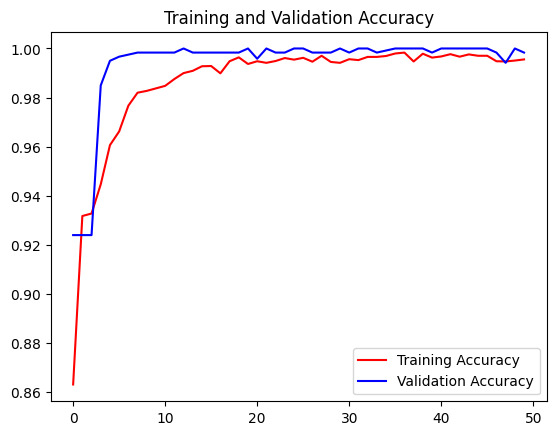

<Figure size 640x480 with 0 Axes>

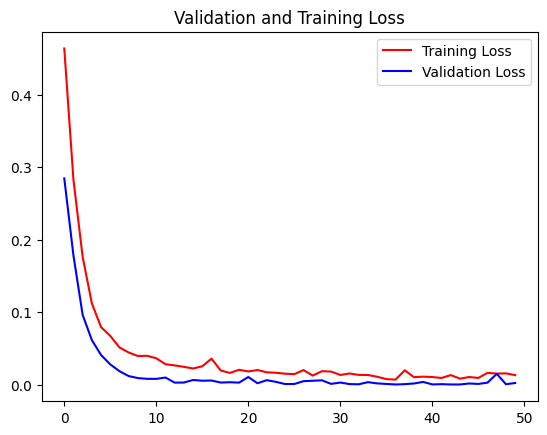

<Figure size 640x480 with 0 Axes>

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Validation and Training Loss')
plt.legend(loc=0)
plt.figure()
plt.show()

## Evaluation

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

Test loss: 0.0021854620426893234
Test accuracy: 0.9983277320861816


## Test Prediction

In [ ]:
x_sample = X_test.sample(1)
x_sample

,nose_x,nose_y,left_eye_x,left_eye_y,right_eye_x,right_eye_y,left_ear_x,left_ear_y,right_ear_x,right_ear_y,...,right_hip_x,right_hip_y,left_knee_x,left_knee_y,right_knee_x,right_knee_y,left_ankle_x,left_ankle_y,right_ankle_x,right_ankle_y
6360,0.580607,0.434225,0.608161,0.387892,0.609835,0.395915,0.621578,0.196181,0.627523,0.20887,...,-0.009387,0.387744,0.192053,0.625467,0.228824,0.77936,0.088603,0.872659,0.152682,0.880853


In [ ]:
x_label_true = df_data.iloc[x_sample.index.values[0]]['class']
print("Actual class is :", x_label_true)

Actual class is : other


In [ ]:
df_data['class'].unique()

array(['push up', 'other'], dtype=object)

Class and index must order by alphabet:
- other --> Index (0)
- push up --> Index (1)

In [ ]:
predict_sample = model.predict(x_sample)

1/1 [==============================] - 0s 103ms/step


In [ ]:
index_class = np.argmax(predict_sample)
print("Predict Class is :")
if index_class == 0:
  print('other')
elif index_class == 1:
  print(name_class)

Predict Class is :
other


## Export Model

In [ ]:
# Download this file for backup
RPS_SAVED_MODEL = "rps_saved_model"

In [ ]:
tf.saved_model.save(model, RPS_SAVED_MODEL)


In [ ]:
%%bash -s $RPS_SAVED_MODEL
saved_model_cli show --dir $1 --tag_set serve --signature_def serving_default

The given SavedModel SignatureDef contains the following input(s):
  inputs['input_1'] tensor_info:
      dtype: DT_FLOAT
      shape: (-1, 34)
      name: serving_default_input_1:0
The given SavedModel SignatureDef contains the following output(s):
  outputs['dense_3'] tensor_info:
      dtype: DT_FLOAT
      shape: (-1, 2)
      name: StatefulPartitionedCall:0
Method name is: tensorflow/serving/predict


2023-06-07 06:34:59.659467: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [ ]:
loaded = tf.saved_model.load(RPS_SAVED_MODEL)


In [ ]:
print(list(loaded.signatures.keys()))
infer = loaded.signatures["serving_default"]
print(infer.structured_input_signature)
print(infer.structured_outputs)

['serving_default']
((), {'input_1': TensorSpec(shape=(None, 34), dtype=tf.float32, name='input_1')})
{'dense_3': TensorSpec(shape=(None, 2), dtype=tf.float32, name='dense_3')}


Convert to TFLITE


In [ ]:
converter = tf.lite.TFLiteConverter.from_saved_model(RPS_SAVED_MODEL)
converter.optimizations = [tf.lite.Optimize.OPTIMIZE_FOR_SIZE]
tflite_model = converter.convert()

In [ ]:
tflite_model_file = 'converted_model.tflite'

with open(tflite_model_file, "wb") as f:
    f.write(tflite_model)

In [ ]:
try:
    from google.colab import files
    files.download('converted_model.tflite')
    files.download('labels.txt')
except:
    pass

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>